In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# lazy 
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import all_estimators
from sklearn.base import ClassifierMixin

# search hyperparameters
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

# modèles 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier

import xgboost as xgb
import shap

# métriques 
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import classification_report,accuracy_score, f1_score, fbeta_score
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, recall_score, precision_recall_curve

# Rééchantillonage
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import RandomUnderSampler

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# sauvegarde model
import pickle

# import des fonctions de modélisations
import  modeling_functions as mf


# Graph de résultat par modèle

Part des données par années  Date
2007   0.02
2008   0.16
2009   0.26
2010   0.38
2011   0.50
2012   0.62
2013   0.71
2014   0.79
2015   0.87
2016   0.96
2017   1.00
Name: count, dtype: float64
Séparation des données avant et après  2015
Fitting  RandomForestClassifier


Nom du modèle : RandomForestClassifier
Rapport de classification :
              precision  recall  f1-score  support
0.0                0.80    0.95      0.87   380.00
1.0                0.81    0.48      0.60   173.00
accuracy           0.80    0.80      0.80     0.80
macro avg          0.81    0.71      0.74   553.00
weighted avg       0.80    0.80      0.79   553.00
Matrice de confusion :
      1.00  0.00
1.00   361    19
0.00    90    83


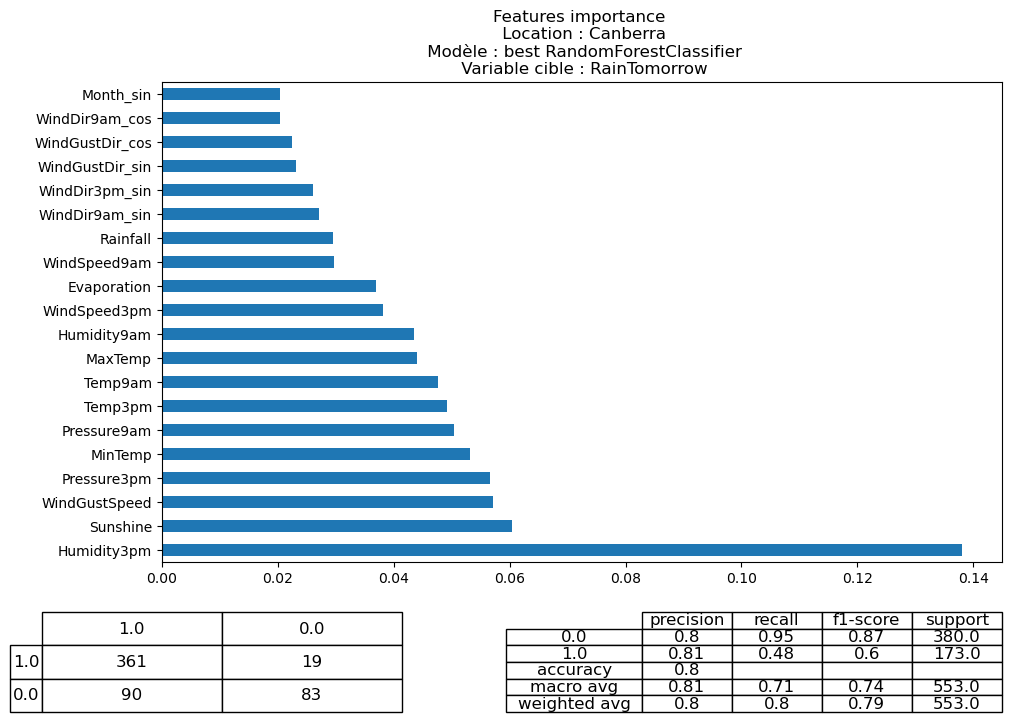

<Figure size 640x480 with 0 Axes>

In [5]:
# Test sur une location

# model par location
select_location = "Canberra"

# Choix des modèles (fixe pour l'instant) 
models_select  = {
    'LogisticRegression': LogisticRegression(max_iter = 500, n_jobs=-1),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1)
}

df_location =  pd.read_csv("../src/data_location_V2/df_" + select_location + ".csv", index_col=["id_Location","id_Date"])
X_train, X_test, y_train, y_test = \
        mf.separation_train_test(df_location, 
                            sep_method = "temporelle", 
                            col_target = "RainTomorrow")


X_train_scaled, X_test_scaled = mf.scaling(X_train, X_test, scaler = MinMaxScaler())


modeling_batch = "largegrid_"
modeling_batch = ""
scoring = "accuracy"
dataset = ""
model_name = "RandomForestClassifier"
model_qual = "best"
variable_cible = "RainTomorrow"

model_dir =  "../saved_models/location/" + modeling_batch + \
    select_location + "_" + model_qual + "_" + model_name

graph_dir = "../modeling_results/location/" + modeling_batch  + \
    select_location + "_" + model_qual + "_" + model_name
graph_title = "\n Location : " + select_location +\
      "\n Modèle : " + modeling_batch + model_qual + " " + model_name +\
      "\n Variable cible : " + variable_cible


mf.plot_model_results(model_name, model_dir, graph_dir, 
                      graph_title,
                      X_train_scaled, X_test_scaled, y_train, y_test)

# Test sur un jeu de modèles sur toutes les locations

In [ ]:
# Test sur une location
df_V2 =  pd.read_csv("../data_saved/data_preprocessed_V2.csv", index_col=["id_Location","id_Date"])
location_list = np.unique(df_V2.index.get_level_values(0).values)

modeling_batch = "largegrid_"
modeling_batch = "largegrid_"
scoring = "accuracy"
dataset = ""
model_name = "RandomForestClassifier"
model_qual = "best"
variable_cible = "RainTomorrow"

for select_location in location_list:
    
    df_location =  pd.read_csv("../src/data_location_V2/df_" + select_location + ".csv", index_col=["id_Location","id_Date"])
    
    X_train, X_test, y_train, y_test = \
        mf.separation_train_test(df_location, 
                            sep_method = "temporelle", 
                            col_target = "RainTomorrow")
    X_train_scaled, X_test_scaled = mf.scaling(X_train, X_test, scaler = MinMaxScaler())
    
    model_dir =  "../saved_models/location/" + modeling_batch + \
    select_location + "_" + model_qual + "_" + model_name
    
    graph_dir = "../modeling_results/location/" + modeling_batch  + \
    select_location + "_" + model_qual + "_" + model_name
    
    graph_title = "\n Location : " + select_location +\
      "\n Modèle : " + modeling_batch + model_qual + " " + model_name +\
      "\n Variable cible : " + variable_cible
    
    mf.plot_model_results(model_name, model_dir, graph_dir, 
                      graph_title,
                      X_train_scaled, X_test_scaled, y_train, y_test)